In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.random.rand(2,100)
Y = X[0,:] + X[1,:] > 0.85

In [3]:
Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True])

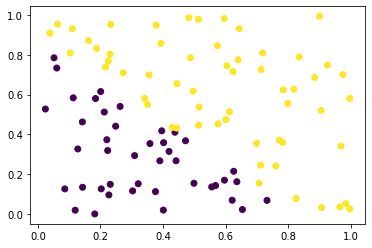

In [4]:
plt.scatter(X[0,:],X[1,:],c=Y)

In [5]:
class Model:
    def __init__(self,shape,learning_rate):
        self.w = np.zeros((shape,1))
        self.b = 0
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        #print(self.w,self.b)
        self.Z = np.dot(self.w.T,X) + self.b
        self.A = self.sigmoidActivation(self.Z)
        return self.A
    
    def compute_cost(self,Y,Y_hat):
        return -( np.dot(Y,np.log(Y_hat).T) + np.dot(1-Y,np.log(1-Y_hat).T))/Y.shape[0]
    
    def back_pass(self,X,Y,Y_hat):
        dw = 1/X.shape[1]*np.dot(X,(Y_hat-Y).T)
        db = 1/X.shape[1]*np.sum(Y_hat-Y)
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        
    def predict(self, X):
        return self.forward_pass(X)
    
    def sigmoidActivation(self,Z):
        return 1/(1+np.exp(-Z))

In [10]:
splitter = Model(X.shape[0],0.05)

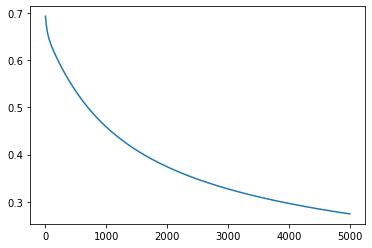

In [11]:
costs=[]
for i in range(5000):
    Y_hat = splitter.forward_pass(X)
    costs.append(splitter.compute_cost(Y,Y_hat)[0])
    splitter.back_pass(X,Y,Y_hat)
plt.plot(costs)

In [12]:
 out = splitter.predict(X)>0.5

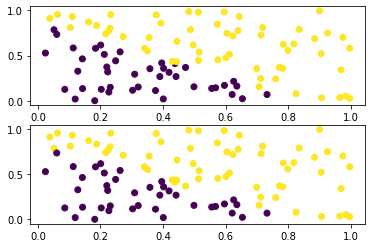

In [13]:
f,a = plt.subplots(2)
a[0].scatter(X[0,:], X[1,:],c=Y)
a[1].scatter(X[0,:], X[1,:],c=out)